In [217]:
import gauss_decomp as gdc
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from iris_lmsalpy import extract_irisL2data as ei
from scipy.io import readsav
from iris_lmsalpy import saveall as sv
import glob
import matplotlib
from astroscrappy import detect_cosmics

In [207]:
os.environ['path']= '/Users/souvikb/various_analysis/GaussSep/'
os.environ['results_dir'] = '/Users/souvikb/various_analysis/GaussSep/Results/'
b_vec_path = '/Users/souvikb/various_analysis/GaussSep/bose_codes/plage_heating/b_vec_data'
os.environ['IDL_saved_arrays'] = '/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/20170305_164005/'
os.environ['iris2_atmos_path'] = '/Users/souvikb/various_analysis/iris2_p/l2_iris_data/Photospheric_imprints_IRIS_l2_data/2017_03_05/'

In [3]:
## Reading alignment parameters from the IDL session
saved_files = glob.glob(os.path.join(os.environ['IDL_saved_arrays'],'*.sav'))
saved_files

['/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/20170305_164005/alignment_params.sav',
 '/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/20170305_164005/cross_correl_sot_iris_aligned_maps.sav',
 '/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/20170305_164005/times_and_xcen.sav',
 '/Users/souvikb/various_analysis/GaussSep/bose_codes/alignment_saved_files/20170305_164005/bxbybz_20170305_164005.sav']

In [6]:
## Loading the times and pointing information.
times_pointing = readsav(saved_files[2])
time_IRIS_rast_orig = times_pointing['t_utc']
time_SOT_rast_orig = times_pointing['t_obs']
x_cen_SOT = times_pointing['crval_sot']
x_cen_IRIS = times_pointing['crval_iris_rast']
indices_sot_saved = times_pointing['index_sot_saved']


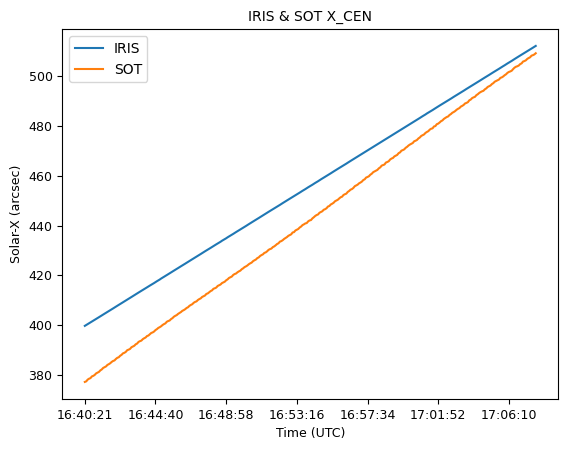

In [146]:
plt.plot(x_cen_IRIS*0.98, label = 'IRIS')
plt.plot(x_cen_SOT, label='SOT')
tick_indices = [0,50,100,150,200,250,300]
tick_labels=[]
for ticks in tick_indices:
    tick_labels.append(time_IRIS_rast_orig[ticks].decode('utf-8')[11:19])
plt.xticks(tick_indices, tick_labels)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend()
plt.ylabel('Solar-X (arcsec)',fontsize=9)
plt.xlabel('Time (UTC)',fontsize=9)
plt.title('IRIS & SOT X_CEN',fontsize=10)
plt.savefig(os.path.join(os.environ['results_dir'],'IRIS_SOT_pointings_2017_03_05.png'), dpi=300, bbox_inches='tight')

In [ ]:
## Aligned SOT and IRIS continuum maps
aligned_maps = readsav(saved_files[1])
aligned_maps.keys()
iris_exp = aligned_maps['iris_exp']
sot_aligned = aligned_maps['sot_final_shifted_for_paper']
cross_correlation_pre = aligned_maps['result1']
cross_correlation_post = aligned_maps['result2']

## Pixel scalings:
aligned_params = readsav(saved_files[0])
# aligned_params.keys()
x_sampling_sot = aligned_params['x_sampling_sot']
y_sampling_sot = aligned_params['y_sampling_sot']

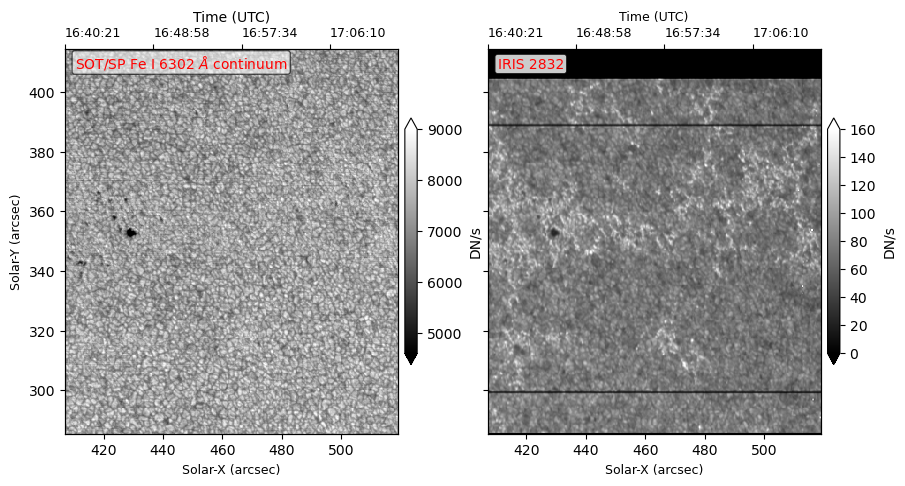

In [147]:
tick_cols = np.array([0, 100, 200, 300,])
tick_times = [time_IRIS_rast_orig[i].decode('utf-8')[11:19] for i in tick_cols]
x0 = 463 - (sot_aligned.shape[1] / 2) * x_sampling_sot
xticks_arcsec = x0 + tick_cols * x_sampling_sot

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(10,5))
ax = ax.ravel()

im=ax[0].imshow(sot_aligned, cmap='gray', interpolation='none', origin = 'lower',vmin=4600,vmax=9000,
                extent=[463-(sot_aligned.shape[1]/2)*x_sampling_sot, 463+(sot_aligned.shape[1]/2)*x_sampling_sot,
                        350-(sot_aligned.shape[0]/2)*y_sampling_sot,350+(sot_aligned.shape[0]/2)*y_sampling_sot])
plt.colorbar(im, fraction=0.035,pad =0.02,extend='both',label='DN/s')
ax[0].set_xlabel('Solar-X (arcsec)',size=9)
ax[0].set_ylabel('Solar-Y (arcsec)',size=9)
ax[0].text(0.03,0.95, r'SOT/SP Fe I 6302 $\AA$ continuum',transform=ax[0].transAxes, 
           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6), color='red')
ax_top_sot = ax[0].twiny()
ax_top_sot.set_xlim(ax[0].get_xlim())
ax_top_sot.set_xticks(xticks_arcsec)
ax_top_sot.set_xticklabels(tick_times, rotation=0, ha='left', fontsize=9)
ax_top_sot.set_xlabel('Time (UTC)')
im = ax[1].imshow(iris_exp/5., cmap='gray', interpolation='none', origin = 'lower',vmin=0,vmax=800/5.,
                extent=[463-(sot_aligned.shape[1]/2)*x_sampling_sot, 463+(sot_aligned.shape[1]/2)*x_sampling_sot,
                        350-(sot_aligned.shape[0]/2)*y_sampling_sot,350+(sot_aligned.shape[0]/2)*y_sampling_sot])

plt.colorbar(im, fraction=0.035,pad =0.02, extend='both',label='DN/s')
ax_top_sot = ax[1].twiny()
ax_top_sot.set_xlim(ax[1].get_xlim())
ax_top_sot.set_xticks(xticks_arcsec)
ax_top_sot.set_xticklabels(tick_times, rotation=0, ha='left', fontsize=9)
ax[1].set_xlabel('Solar-X (arcsec)',size=9)
ax_top_sot.set_xlabel('Time (UTC)',size=9)
ax[1].text(0.03,0.95, r'IRIS 2832',transform=ax[1].transAxes, 
           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8), color='red')
plt.savefig(os.path.join(os.environ['results_dir'],'IRIS_SOT_co_aligned_map_2017_03_05.png'), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Cross-correlation matrix between SOT/SP and IRIS')

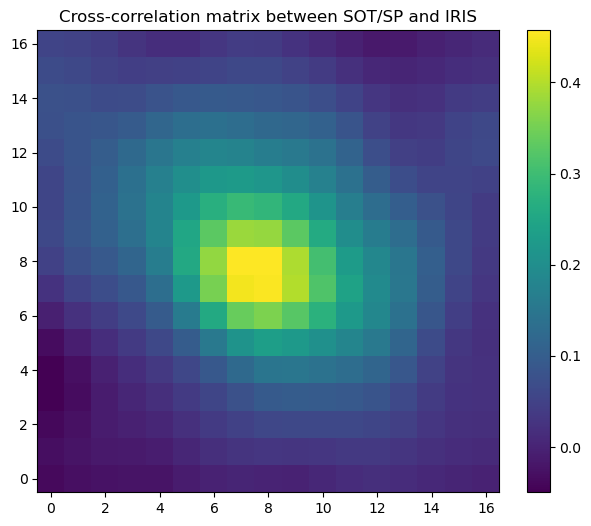

In [179]:
plt.figure(figsize=(7,6))
plt.imshow(cross_correlation_post,interpolation='none',origin='lower')
plt.colorbar(fraction=0.05)
plt.title('Cross-correlation matrix between SOT/SP and IRIS')

In [193]:
## Loading the Magnetic energy densities
E_dens = np.load(b_vec_path+'/Bz_magnetic_energy_densities.npz')
E_density_gt = E_dens['E_density_gt']
E_density_lt = E_dens['E_density_lt']
Bz_obs = E_dens['Bz']

In [186]:
E_density_gt.shape, sot_aligned.shape

((512, 511), (407, 377))

The energy densities are in the original **SOT/SP** pixel scale. They are to be co-aligned (cropped and shifted) to IRIS FOV.


In [189]:
aligned_params.keys()

dict_keys(['final_sot_x_crop', 'final_sot_y_crop', 'shifts', 'dypos_iris', 'dxpos_iris', 'x_sampling_sot', 'y_sampling_sot'])

In [ ]:
final_sot_x_crop = aligned_params['final_sot_x_crop']
final_sot_y_crop = aligned_params['final_sot_y_crop']
shifts = aligned_params['shifts']
dxpos_iris = aligned_params['dxpos_iris']
dypos_iris = aligned_params['dypos_iris']

In [262]:
## First we need to shift 
from skimage.transform import AffineTransform, warp
transform = AffineTransform(translation=(shifts[1], shifts[0])) # x first, then y
shifted_e_dens_gt = warp(E_density_gt, inverse_map=transform.inverse, preserve_range=True)
shifted_e_dens_lt = warp(E_density_lt, inverse_map=transform.inverse, preserve_range=True)
shifted_Bz_obs = warp(Bz_obs.astype(float), inverse_map=transform.inverse, preserve_range=True)


In [325]:
## The we need to crop

final_e_dens_gt = shifted_e_dens_gt[final_sot_y_crop[0]:final_sot_y_crop[1]+1,final_sot_x_crop[0]:final_sot_x_crop[1]+1]
final_e_dens_lt = shifted_e_dens_lt[final_sot_y_crop[0]:final_sot_y_crop[1]+1,final_sot_x_crop[0]:final_sot_x_crop[1]+1]
Bz_obs_final = shifted_Bz_obs[final_sot_y_crop[0]:final_sot_y_crop[1]+1,final_sot_x_crop[0]:final_sot_x_crop[1]+1]

## Now loading the IRIS2+ atmospheres

In [208]:
aux = sv.load(os.path.join(os.environ['iris2_atmos_path'],'inv_mod_IRIS2p_knn_c3_iris_l2_20170305_164021_3620106076_raster_t000_r00000.jbl'))
model = aux['model']
model[0]['wl'][10:14]
model[0]['wl'][14:18]

Loading joblib file... /Users/souvikb/various_analysis/iris2_p/l2_iris_data/Photospheric_imprints_IRIS_l2_data/2017_03_05/inv_mod_IRIS2p_knn_c3_iris_l2_20170305_164021_3620106076_raster_t000_r00000.jbl
The varible types are:
data : <class 'numpy.memmap'>
inv : <class 'numpy.memmap'>
model : <class 'list'>
wl : <class 'numpy.memmap'>
wlc : <class 'list'>
wl2size : <class 'list'>
wl2scl : <class 'list'>
extent : <class 'list'>
extent_coords : <class 'tuple'>
mu : <class 'numpy.float64'>
texp : <class 'float'>
obsid : <class 'str'>
percentages : <class 'dict'>
crop_wei4knn : <class 'list'>
chi2 : <class 'numpy.memmap'>
inv_method : <class 'str'>
original_filename : <class 'str'>
name_jbl : <class 'str'>
jbl_file_saving_stamptime : <class 'str'>


Suggested commands:
data = aux['data']
inv = aux['inv']
model = aux['model']
wl = aux['wl']
wlc = aux['wlc']
wl2size = aux['wl2size']
wl2scl = aux['wl2scl']
extent = aux['extent']
extent_coords = aux['extent_coords']
mu = aux['mu']
texp = aux['te

memmap([-4.8, -4.6, -4.4, -4.2])

In [270]:
## Extracting the IRL, temperature and Electron densities from IRIS2+ in the relevant optical depths
IRL = model[4].data[:,:,1] ## Integrated radiative losses
Temp = np.nanmean(model[0].data[:,:,10:14],axis=2) ## Temperature averaged between log tau = [-5.6, -5.4, -5.2, -5. ]
# Temp = np.nanmean(model[0].data[:,:,14:18],axis=2) ## Temperature averaged between log tau = [-4.8, -4.6, -4.4, -4.2]
Ne = np.nanmean(model[3].data[:,:,10:14],axis=2) ## Electron density averaged between ---""------
# Ne = np.nanmean(model[3].data[:,:,14:18],axis=2) ## Electron density averaged between ---""------log tau = [-4.8, -4.6, -4.4, -4.2]

In [315]:
mask, clean_IRL = detect_cosmics(IRL, sigclip=1.5,objlim=2, readnoise=4, cleantype='medmask',niter=6)

In [321]:
from scipy.ndimage import zoom ## Zoom from scipy does all and more than congrid in IDL
nx, ny = IRL.shape  # current (rows, cols) in arcsec map
# print(nx,ny)
scale_x = (np.shape(IRL)[0] * dypos_iris / y_sampling_sot) / nx
scale_y = (np.shape(IRL)[1] * dxpos_iris / x_sampling_sot) / ny
# print(scale_x,scale_y)

IRIS2_t_aligned_params = [clean_IRL,Temp,Ne]
IRIS2_resampled = []

for params in IRIS2_t_aligned_params:
    # print(params)
    # mask, cleaned_params = detect_cosmics(params, sigclip=1.5,objlim=2, readnoise=4, cleantype='medmask',niter=6)

    resampled= zoom(params,
                    zoom=(scale_x, scale_y),
                    order=1, #order = 1 for linear interpolation. Cubic is causing ringing effects
                    mode='nearest') # for edges
    IRIS2_resampled.append(resampled)

print(IRIS2_resampled[0].shape)## Exactly the size I wanted.

(407, 377)


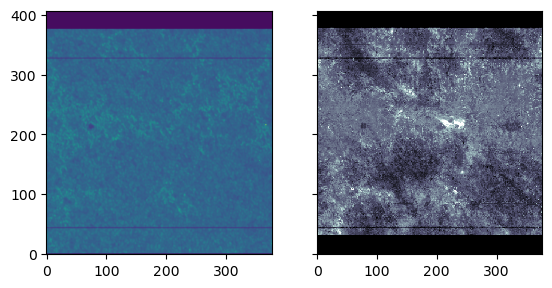

In [327]:
fig,ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True)
ax= ax.ravel()
ax[0].imshow(iris_exp, origin='lower',alpha=1)
ax[1].imshow(IRIS2_resampled[1],origin='lower',cmap='bone',interpolation='none',vmin=4.5,vmax=10.5,alpha=1)

/var/folders/ms/lnhrcvqs3z1c4t2zkhv2wt600000gp/T/ipykernel_79066/2115170555.py:30: RuntimeWarning: divide by zero encountered in log10
  im=axes[5].imshow(np.log10(IRIS2_resampled[2]), origin='lower', cmap='turbo', vmin=10.5, vmax=12.6,interpolation='none',


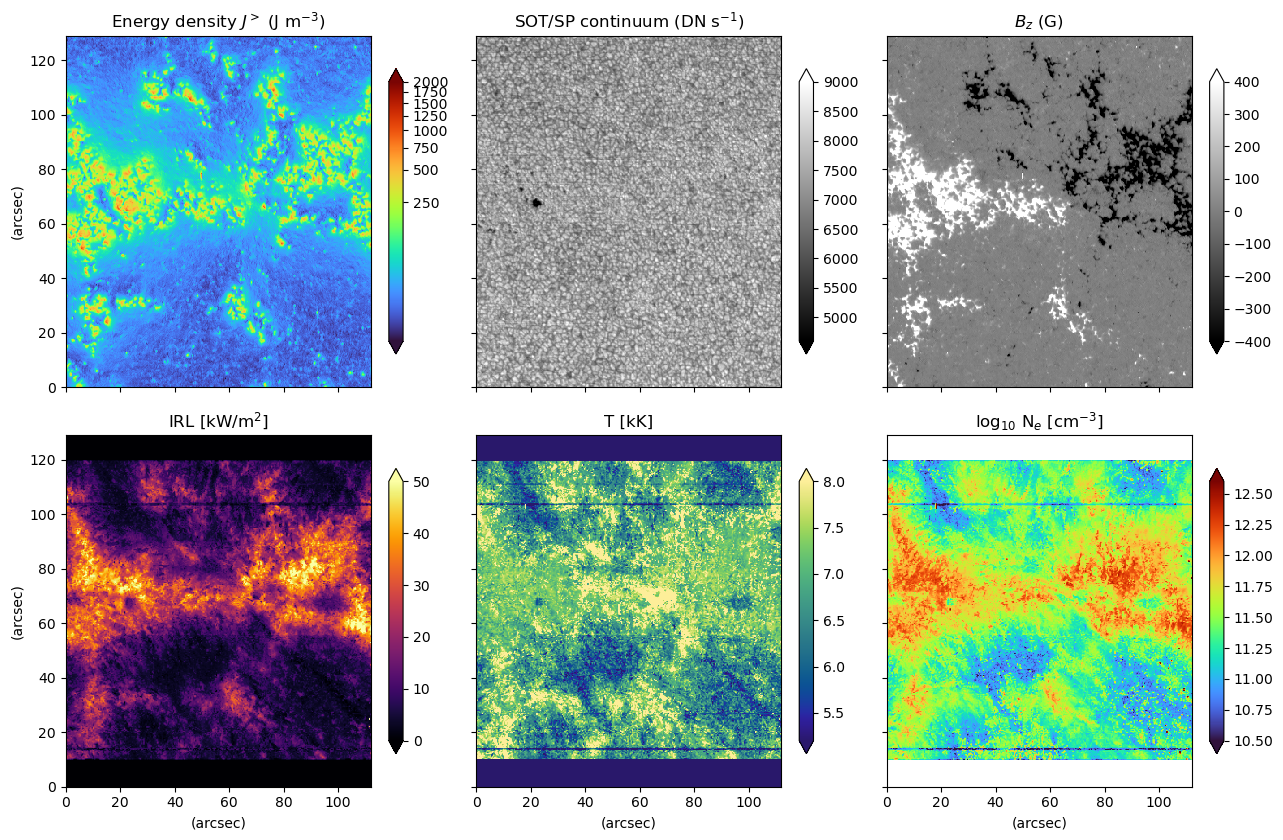

In [399]:
import cmocean
fig, axes = plt.subplots(2, 3, figsize=(13, 8.5), sharex=True, sharey=True)
axes = axes.ravel()

im=axes[0].imshow(final_e_dens_gt, origin='lower', cmap='turbo', norm=colors.PowerNorm(0.3,vmax=2.e3), interpolation='none',
                  extent=[0,final_e_dens_gt.shape[1]*x_sampling_sot, 0, final_e_dens_gt.shape[0]*y_sampling_sot])
plt.colorbar(im, fraction=0.04, extend='both')
axes[0].set_title(r'Energy density $J^{>}$ (J m$^{-3}$)')

im=axes[1].imshow(sot_aligned, origin='lower', cmap='gray',interpolation='none',vmin=4600,vmax=9000,
               extent=[0,final_e_dens_gt.shape[1]*x_sampling_sot, 0, final_e_dens_gt.shape[0]*y_sampling_sot])
plt.colorbar(im, fraction=0.04, extend='both')
axes[1].set_title(r'SOT/SP continuum (DN s$^{-1}$)')

im=axes[2].imshow(Bz_obs_final, origin='lower', cmap='gray', vmin=-400, vmax=400,interpolation='none',
               extent=[0,final_e_dens_gt.shape[1]*x_sampling_sot, 0, final_e_dens_gt.shape[0]*y_sampling_sot])
plt.colorbar(im, fraction=0.04, extend='both')
axes[2].set_title(r'$B_z$ (G)')

im=axes[3].imshow(IRIS2_resampled[0], origin='lower', cmap='inferno', vmin=0, vmax=50,interpolation='none',
               extent=[0,final_e_dens_gt.shape[1]*x_sampling_sot, 0, final_e_dens_gt.shape[0]*y_sampling_sot])
plt.colorbar(im, fraction=0.04, extend='both')
axes[3].set_title('IRL [kW/m$^{2}$]')

im=axes[4].imshow(IRIS2_resampled[1], origin='lower', cmap=cmocean.cm.haline, vmin=5.2, vmax=8.0,interpolation='none',
               extent=[0,final_e_dens_gt.shape[1]*x_sampling_sot, 0, final_e_dens_gt.shape[0]*y_sampling_sot])
axes[4].set_title('T [kK]')
plt.colorbar(im, fraction=0.04, extend='both')

im=axes[5].imshow(np.log10(IRIS2_resampled[2]), origin='lower', cmap='turbo', vmin=10.5, vmax=12.6,interpolation='none',
               extent=[0,final_e_dens_gt.shape[1]*x_sampling_sot, 0, final_e_dens_gt.shape[0]*y_sampling_sot])
plt.colorbar(im, fraction=0.04, extend='both')
axes[5].set_title('log$_{10}$ N$_e$ [cm$^{-3}$]')

for ax in axes[3:]:
    ax.set_xlabel('(arcsec)')
for ax in axes[::3]:
    ax.set_ylabel('(arcsec)')
fig.tight_layout()
plt.savefig(os.path.join(os.environ['results_dir'],'3_by_2_pan_2017_03_05.png'), dpi=300, bbox_inches='tight')



### Finally, saving the required co-aligned arrays

In [400]:
np.savez(b_vec_path+'/aligned_iris_sot_upper_chromos.npz',E_dens_gt = final_e_dens_gt, E_dens_lt = final_e_dens_lt, Bz_align=Bz_obs_final,
         IRL = IRIS2_resampled[0], Temp= IRIS2_resampled[1], Ne = IRIS2_resampled[2])